In [2]:
import geopandas

In [3]:
electoral = geopandas.read_file('/Users/AAA/Downloads/electoral-boundary-2015/electoral-boundary-2015-geojson.geojson')
m2019 = geopandas.read_file('/Users/AAA/Downloads/master-plan-2019-subzone-boundary-no-sea/master-plan-2019-subzone-boundary-no-sea-geojson.geojson')

In [78]:
electoral['constituency'] = electoral.Description.str.extract('<th>ED_DESC<\/th> <td>([\w\s-]*)<\/td>')
electoral['constituency'] = electoral['constituency'].str.title()

m2019['region'] = m2019.Description.str.replace(r"\(|\)|\\|\'",'')
m2019['region'] = m2019.region.str.extract('<th>SUBZONE_N<\/th> <td>([\w\s-]*)<\/td>')
m2019['region'] = m2019.region.str.title()

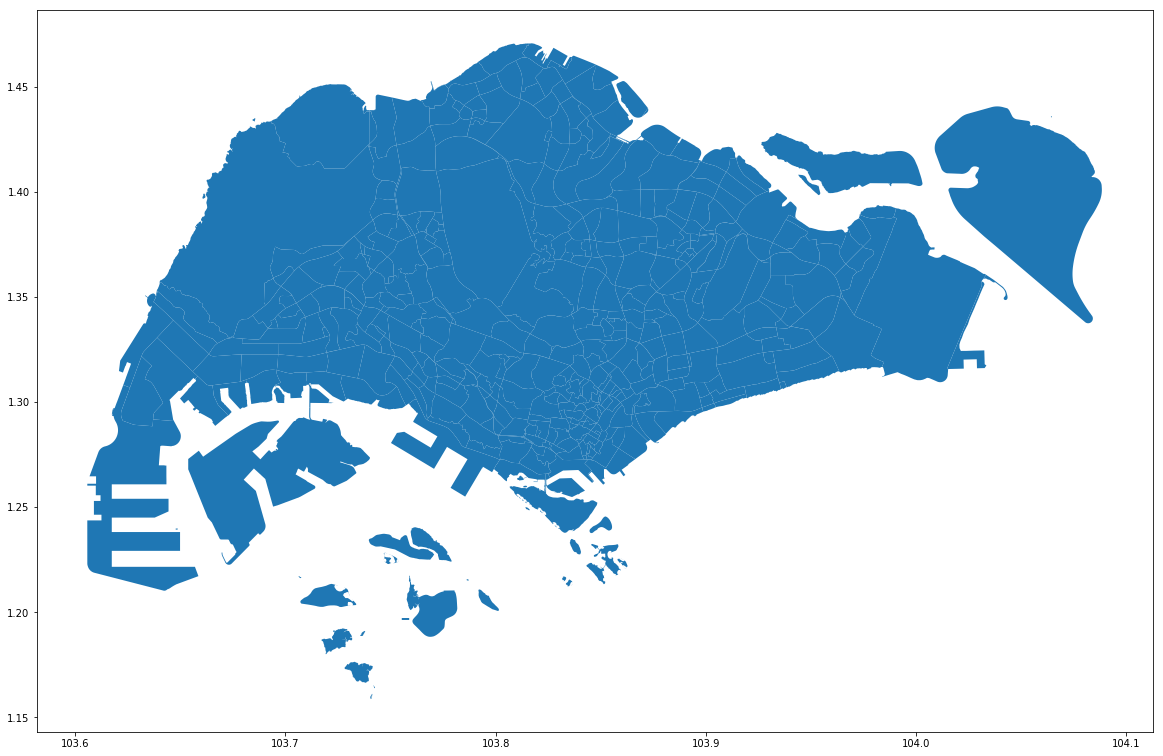

In [85]:
intersection = geopandas.overlay(electoral, m2019, how='intersection')
ax = intersection.plot(figsize = (20,15))

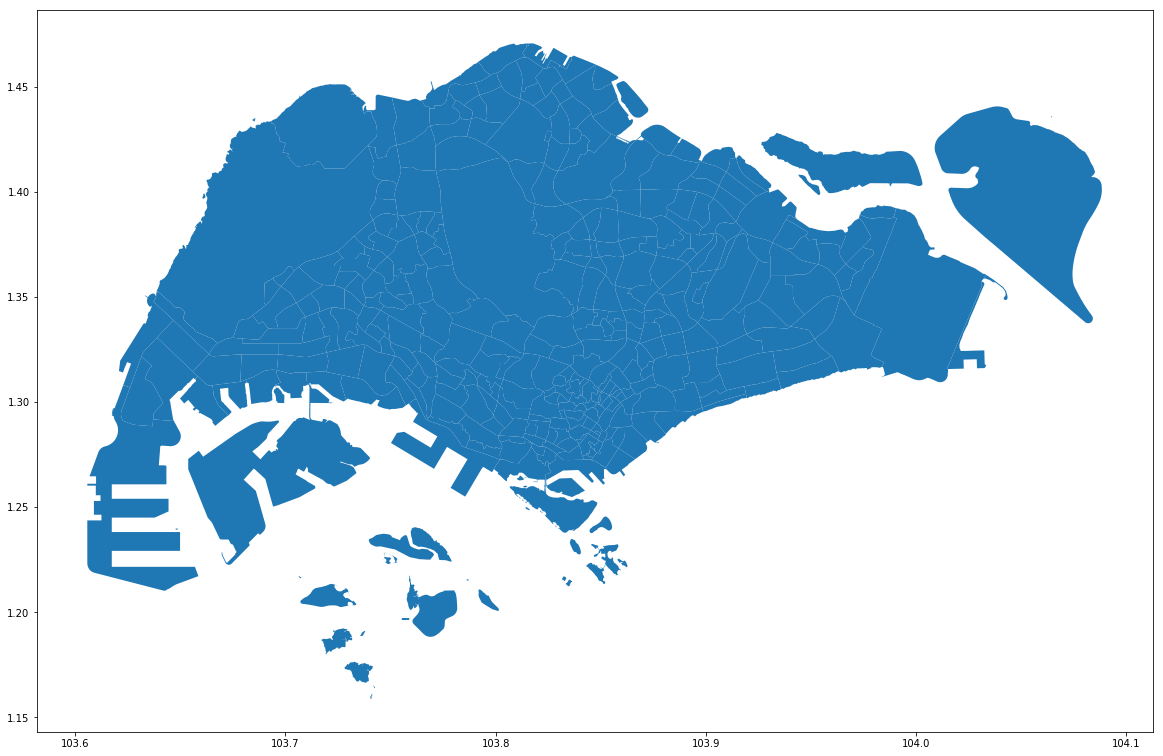

In [92]:
simplified = intersection.dissolve(by='region')
simplified = simplified.reset_index()
ax = simplified.plot(figsize = (20,15))

In [95]:
simplified.to_file("/Users/AAA/Downloads/2015 electoral overlay master plan v2.geojson", driver='GeoJSON')